In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 10000
training_epochs = 200
nb_classes = 4
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_0dB.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:13]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data)

(400000, 12) (400000, 4)
[[ 3.985979    2.9266756  -1.4389254  ... -0.9246753  -0.30659586
   0.24227208]
 [-0.16229424 -2.2363117   0.46064845 ...  1.0533752   0.99633783
   1.0021063 ]
 [-1.4659348   1.0638415  -1.7712959  ... -0.556693    0.6281906
  -0.8111011 ]
 ...
 [-0.6823769   1.5280095  -0.04487954 ...  0.4623038  -0.16403863
   0.66769725]
 [ 0.9017219   0.17446594 -0.03713961 ... -0.63819283 -0.5459519
   0.48846105]
 [-0.7833187  -1.8923963   1.1181778  ... -0.30434546  0.33093032
  -1.3220665 ]]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=384, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=192, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 384)               4992      
_________________________________________________________________
dropout (Dropout)            (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 192)               73920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 772       
Total params: 79,684
Trainable params: 79,684
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , validation_split=0.2, epochs=training_epochs)

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 1.3484 - accuracy: 0.5477 - val_loss: 2.6912 - val_accuracy: 0.0000e+00
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.9268 - accuracy: 0.7213 - val_loss: 1.7365 - val_accuracy: 0.1508
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.7357 - accuracy: 0.7756 - val_loss: 1.4140 - val_accuracy: 0.4032
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.7903 - val_loss: 1.2801 - val_accuracy: 0.4732
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6157 - accuracy: 0.7954 - val_loss: 1.2776 - val_accuracy: 0.4743
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5904 - accuracy: 0.7978 - val_loss: 1.2767 - val_accuracy: 0.4729
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5738 - accuracy: 0.7997 - val_loss: 1.2740 - val_accuracy: 0.4746
Epoch 8/2

Epoch 59/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5129 - accuracy: 0.8053 - val_loss: 1.1925 - val_accuracy: 0.5160
Epoch 60/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5140 - accuracy: 0.8056 - val_loss: 1.2953 - val_accuracy: 0.4827
Epoch 61/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 0.8054 - val_loss: 1.2554 - val_accuracy: 0.4946
Epoch 62/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.8060 - val_loss: 1.2309 - val_accuracy: 0.5041
Epoch 63/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 0.8053 - val_loss: 1.2124 - val_accuracy: 0.5084
Epoch 64/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.8056 - val_loss: 1.2475 - val_accuracy: 0.4973
Epoch 65/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5115 - accuracy: 0.8060 - val_loss: 1.1393 - val_accuracy: 0.5373
Epoch 

32/32 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.8063 - val_loss: 1.1649 - val_accuracy: 0.5334
Epoch 174/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.8063 - val_loss: 1.2057 - val_accuracy: 0.5180
Epoch 175/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4989 - accuracy: 0.8066 - val_loss: 1.2166 - val_accuracy: 0.5149
Epoch 176/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.8069 - val_loss: 1.2201 - val_accuracy: 0.5116
Epoch 177/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.8064 - val_loss: 1.2178 - val_accuracy: 0.5152
Epoch 178/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4992 - accuracy: 0.8064 - val_loss: 1.1926 - val_accuracy: 0.5216
Epoch 179/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4992 - accuracy: 0.8067 - val_loss: 1.2753 - val_accuracy: 0.4950
Epoch 180/200

In [20]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

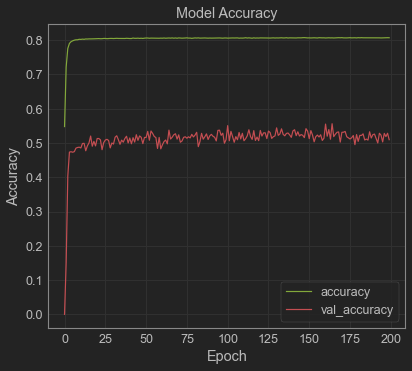

In [21]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_0dB_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:13]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(80000, 12) (80000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

2500/2500 [==============================] - 4s 2ms/step - loss: 0.6313 - accuracy: 0.7505
loss:  0.6313492059707642
accuracy 0.7504749894142151


In [14]:
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
# for p, y in zip(pred, y_test_bit.flatten()):
 #   print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

In [22]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        print("False : {}".format(i))
        print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

False : 0
[0] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 11
[11] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 20
[20] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 23
[23] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 33
[33] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 39
[39] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 44
[44] data : [ 0.70710677 -0.7

bit error count :  1
False : 1904
[1904] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 1906
[1906] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 1916
[1916] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 1917
[1917] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 1926
[1926] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 1929
[1929] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error 

bit error count :  1
False : 3940
[3940] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 3946
[3946] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 3947
[3947] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 3948
[3948] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 3951
[3951] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 3952
[3952] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error coun

[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 5821
[5821] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 5830
[5830] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 5839
[5839] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 5849
[5849] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 5856
[5856] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 5857
[5857] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pr

[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 7817
[7817] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 7822
[7822] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 7825
[7825] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 7832
[7832] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 7835
[7835] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 7838
[7838] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pr

[9612] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 9613
[9613] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 9621
[9621] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 9637
[9637] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 9638
[9638] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 9641
[9641] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 9644
[9644]

[11506] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 11511
[11511] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 11521
[11521] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 11522
[11522] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 11529
[11529] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 11536
[11536] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
Fals

False : 13507
[13507] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 13512
[13512] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 13514
[13514] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 13518
[13518] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 13524
[13524] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 13530
[13530] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False 

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 15412
[15412] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 15417
[15417] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 15419
[15419] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 15422
[15422] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 15429
[15429] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 15443
[15443] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[2

bit error count :  1
False : 17425
[17425] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17426
[17426] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 17430
[17430] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17431
[17431] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17434
[17434] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17437
[17437] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit er

[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 19362
[19362] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 19365
[19365] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 19370
[19370] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 19374
[19374] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 19380
[19380] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 19381
[19381] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[40000

[22138] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 22145
[22145] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 22148
[22148] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 22151
[22151] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 22168
[22168] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 22172
[22172] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 22176
[22176] da

bit error count :  1
False : 24754
[24754] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24760
[24760] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24767
[24767] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24771
[24771] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24776
[24776] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24782
[24782] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit er

[27436] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 27442
[27442] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 27443
[27443] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 27447
[27447] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27448
[27448] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27450
[27450] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 27454
[2

bit error count :  1
False : 30282
[30282] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30283
[30283] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 30288
[30288] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 30301
[30301] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 30307
[30307] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 30308
[30308] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit er

[32746] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 32747
[32747] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 32748
[32748] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 32749
[32749] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 32751
[32751] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 32757
[32757] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 32761
[32761] da

[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 35153
[35153] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 35162
[35162] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 35169
[35169] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 35170
[35170] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 35171
[35171] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 35172
[35172] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred d

False : 37672
[37672] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 37676
[37676] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 37680
[37680] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 37693
[37693] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 37694
[37694] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 37719
[37719] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
Fa

[40228] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 40232
[40232] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 40241
[40241] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[60000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 40242
[40242] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 40243
[40243] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 40249
[40249] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 40251
[40251] data : [0.7071

False : 42906
[42906] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 42914
[42914] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 42915
[42915] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 42923
[42923] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 42933
[42933] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 42936
[42936] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 42937
[42937] data

[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 45438
[45438] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 45439
[45439] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 45441
[45441] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 45447
[45447] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 45450
[45450] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 45452
[45452] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0

bit error count :  1
False : 48083
[48083] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 48087
[48087] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 48092
[48092] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 48094
[48094] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 48096
[48096] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 48112
[48112] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
F

[50800] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 50804
[50804] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 50824
[50824] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 50827
[50827] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 50837
[50837] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 50862
[50862] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 50871
[50871] data : [0.70710677

[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 53451
[53451] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 53461
[53461] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 53465
[53465] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 53466
[53466] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 53470
[53470] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 53478
[53478] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.7071067

[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 56063
[56063] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 56067
[56067] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 56070
[56070] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 56080
[56080] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 56089
[56089] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 56095
[56095] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.707

[58806] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 58809
[58809] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 58826
[58826] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 58827
[58827] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 58848
[58848] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 58851
[58851] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 58857
[58857] data : [0.70710677 0.7

[60424] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 60425
[60425] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 60428
[60428] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 60429
[60429] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 60430
[60430] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 60432
[60432] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 6043

False : 61242
[61242] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 61244
[61244] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 61247
[61247] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 61252
[61252] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 61253
[61253] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 61255
[61255] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62092
[62092] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62093
[62093] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62098
[62098] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62099
[62099] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 62100
[62100] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 62106
[62106] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[2

[62937] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62938
[62938] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 62939
[62939] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62942
[62942] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62943
[62943] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62944
[62944] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 62945
[62945

[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 63786
[63786] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 63787
[63787] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 63789
[63789] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 63793
[63793] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 63794
[63794] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 63796
[63796] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000

[64639] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 64645
[64645] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 64646
[64646] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 64648
[64648] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 64649
[64649] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 64650
[64650] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
Fals

[65517] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 65527
[65527] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 65528
[65528] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 65529
[65529] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 65531
[65531] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 65533
[65533] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 6553

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 66333
[66333] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 66334
[66334] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 66335
[66335] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 66336
[66336] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 66340
[66340] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 66341
[66341] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 67163
[67163] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 67164
[67164] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 67166
[67166] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 67168
[67168] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 67169
[67169] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 67170
[67170] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677

bit error count :  1
False : 68020
[68020] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 68024
[68024] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 68028
[68028] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 68030
[68030] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 68031
[68031] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 68032
[68032] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.7071

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 68829
[68829] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 68832
[68832] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 68833
[68833] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 68834
[68834] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 68835
[68835] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 68836
[68836] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677

[69659] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 69661
[69661] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 69662
[69662] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 69663
[69663] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 69664
[69664] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 69665
[69665] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 69671
[69671

[70518] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 70519
[70519] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 70522
[70522] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 70525
[70525] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 70530
[70530] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 70531
[70531] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 71349
[71349] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 71351
[71351] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 71352
[71352] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 71356
[71356] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 71359
[71359] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 71361
[71361] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[2

[72236] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 72237
[72237] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 72242
[72242] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 72243
[72243] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 72245
[72245] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 72247
[72247] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 72251
[7

[73036] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73037
[73037] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73038
[73038] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73049
[73049] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73052
[73052] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73054
[73054] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 73056
[73056

bit error count :  1
False : 73851
[73851] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73852
[73852] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 73853
[73853] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73854
[73854] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 73856
[73856] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 73857
[73857] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 74713
[74713] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 74718
[74718] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 74719
[74719] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 74720
[74720] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 74723
[74723] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 74725
[74725] data : [ 0.70710677  0.70710677  0.70710677 -0.7071

bit error count :  1
False : 75563
[75563] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 75564
[75564] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 75565
[75565] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 75566
[75566] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 75567
[75567] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 75570
[75570] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit er

[76385] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 76387
[76387] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 76388
[76388] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 76390
[76390] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 76396
[76396] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 76399
[76399] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 7640

[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 77262
[77262] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 77265
[77265] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 77266
[77266] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 77267
[77267] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 77268
[77268] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 77271
[77271] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[4

False : 78190
[78190] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 78192
[78192] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78193
[78193] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78194
[78194] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 78199
[78199] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78200
[78200] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[40000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  

bit error count :  1
False : 78956
[78956] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78961
[78961] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78964
[78964] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78966
[78966] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78970
[78970] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 78971
[78971] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677

False : 79789
[79789] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 79791
[79791] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 79792
[79792] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 79794
[79794] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 79795
[79795] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 79798
[79798] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit err

In [18]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.06829375
